*Credits: materials from this notebook belong to YSDA [Practical DL](https://github.com/yandexdataschool/Practical_DL) course. Special thanks for making them available online.*

# Lab assignment №1, part 1

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

## 1. Matrix differentiation

Since it easy to google every task please please please try to undestand what's going on. The "just answer" thing will be not counted, make sure to present derivation of your solution. It is absolutely OK if you found an answer on web then just exercise in $\LaTeX$ copying it into here.

Useful links: 
[1](http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf)
[2](http://www.atmos.washington.edu/~dennis/MatrixCalculus.pdf)

## ex. 1

$$  
y = x^Tx,  \quad x \in \mathbb{R}^N 
$$

$$
\frac{dy}{dx} = 
$$

#### Ответ:

Здесь я использовал одно из основных матричных тождеств, а также свойство единичной матрицы:
$$
\frac{d\textbf{y}}{d\textbf{x}} = \frac{d\textbf{x}^Td\textbf{x}}{d\textbf{x}} = \frac{d\textbf{x}^TEd\textbf{x}}{d\textbf{x}} = (E + E^T)\textbf{x} = \{E = E^T\} = 2E\textbf{x} = 2\textbf{x}
$$

## ex. 2

$$ y = tr(AB) \quad A,B \in \mathbb{R}^{N \times N} $$ 

$$
\frac{dy}{dA} =
$$

#### Ответ:

Здесь я расписал след матрицы по определению и использовал факт: $$ \frac{da_{ik}}{da_{ij}} = 1, k = j $$
$$
\frac{dy}{dA} = \frac{d\textbf{tr(AB)}}{dA} = \{AB = \sum_{k = 1}^{N}a_{ik}b_{kj}; tr(AB) = \sum_{i = 1}^{N}\sum_{k = 1}^{N}a_{ik}b_{ki};\} = \frac{d\sum_{i = 1}^{N}\sum_{k = 1}^{N}a_{ik}b_{ki}}{da_{ij}} = \{k  = j\} = \{b\}_{ji} = B^T
$$

Также это свойство было приведено в файле.

## ex. 3

$$  
y = x^TAc , \quad A\in \mathbb{R}^{N \times N}, x\in \mathbb{R}^{N}, c\in \mathbb{R}^{N} 
$$

$$
\frac{dy}{dx} =
$$

$$
\frac{dy}{dA} =
$$ 

Hint for the latter (one of the ways): use *ex. 2* result and the fact 
$$
tr(ABC) = tr (CAB)
$$

#### Ответ:
##### 1:
Можно развернуть выражение, а потом продифференцировать по $$x_i$$.
$$
\frac{dy}{d\textbf{x}} = \frac{d\textbf{x}^TAc}{d\textbf{x}} = \{x^TA = \sum_{i = 1}^{N}{x_ia_{ij}}; y(\textbf{x}) = \textbf{x}^TAc = \sum_{i = 1}^{N}\sum_{j = 1}^{N}{x_ia_{ij}c_j}; \frac{dy}{d\textbf{x}} = [(\frac{dy(\textbf{x})}{dx_i})_i]^T\} = [(\sum_{j = 1}^{N}{a_{ij}c_j})_{i}]^T = A\textbf{c};
$$
##### 2:
$$
\frac{dy}{dA} = \frac{\sum_{i = 1}^{N}\sum_{j = 1}^{N}{x_ia_{ij}c_j}}{da_{ij}} = x_ic_j = \textbf{x}\textbf{c}^T = (\textbf{x}, \textbf{c})
$$

## ex. 4

Classic matrix factorization example. Given matrix $X$ you need to find $A$, $S$ to approximate $X$. This can be done by simple gradient descent iteratively alternating $A$ and $S$ updates.
$$
J = || X - AS ||_F^2  , \quad A\in \mathbb{R}^{N \times R} , \quad S\in \mathbb{R}^{R \times M}
$$
$$
\frac{dJ}{dS} = ? 
$$

You may use one of the following approaches:

#### First approach
Using ex.2 and the fact:
$$
|| X ||_F^2 = tr(XX^T) 
$$ 
it is easy to derive gradients (you can find it in one of the refs). 

#### Second approach
You can use *slightly different techniques* if they suits you. Take a look at this derivation:
<img src="grad.png">
(excerpt from [Handbook of blind source separation, Jutten, page 517](https://books.google.ru/books?id=PTbj03bYH6kC&printsec=frontcover&dq=Handbook+of+Blind+Source+Separation&hl=en&sa=X&ved=0ahUKEwi-q_apiJDLAhULvXIKHVXJDWcQ6AEIHDAA#v=onepage&q=Handbook%20of%20Blind%20Source%20Separation&f=false), open for better picture).

#### Third approach
And finally we can use chain rule! 
let $ F = AS $ 

**Find**
$$
\frac{dJ}{dF} =  
$$ 
and 
$$
\frac{dF}{dS} =  
$$ 
(the shape should be $ NM \times RM )$.

Now it is easy do get desired gradients:
$$
\frac{dJ}{dS} =  
$$ 

##### Ответ:
Я выбрал 1-й подход. Если:
$$
||X||^2_F = tr(XX^T)
$$
то:
$$
J = ||X - AS||^2_F = tr((X - AS)(X - AS)^T)
$$
Тогда задача сводится к следующему:
$$
\frac{dJ}{dS} = \frac{d[tr((X - AS)(X - AS)^T)]}{dS} = \frac{d[tr(XX^T)]}{dS} - \frac{d[tr(XS^TA^T)]}{dS} - \frac{d[tr(ASX^T)]}{dS} + \frac{d[tr(ASS^TA^T)]}{dS}
$$
1-е слагамое обнуляется.
Введем подобное преобразование, как в ex.2:
$$
\frac{dy}{dA} = \frac{dtr(A^TB)}{dA} = \{A^TB = \sum_{k = 1}^{N}a_{ik}b_{kj}; tr(A^TB) = \sum_{i = 1}^{N}\sum_{k = 1}^{N}a_{ik}b_{ki};\} = \frac{d\sum_{i = 1}^{N}\sum_{k = 1}^{N}a_{ik}b_{ki}}{da_{ji}} = \{i = j; k = i;\} = \{b\}_{ij} = B
$$

Тогда остальные слагаемые можно преобразовать, используя формулу, которую мы только что получили:
$$
\frac{d[tr(XS^TA^T)]}{dS} = \frac{d[tr(S^TA^TX)]}{dS} = A^TX
$$
$$
\frac{d[tr(ASX^T)]}{dS} =  \frac{d[tr(SX^TA)]}{dS} = (X^TA)^T = A^TX
$$
$$
\frac{d[tr(ASS^TA^T)]}{dS} = \frac{d[tr(SS^TA^TA)]}{dS} = (S^TA^TA)^T = A^TAS
$$
Получим:
$$
\frac{dJ}{dS} = A^TAS - 2A^TX = A^T(AS - 2X)
$$

## 2. kNN questions
Here come the questions from the assignment0_01. Please, refer to the assignment0_01 to get the context of the questions.

### Question 1

Notice the structured patterns in the distance matrix, where some rows or columns are visible brighter. (Note that with the default color scheme black indicates low distances while white indicates high distances.)

- What in the data is the cause behind the distinctly bright rows?
- What causes the columns?

*Your Answer:*
После изменения файла и перекомпиляции, я увидел следующую картину:
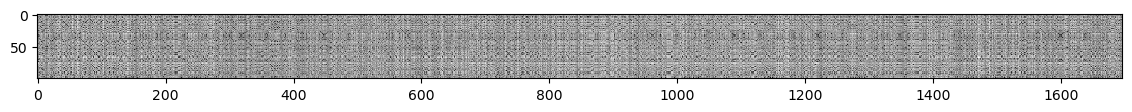

1. Причиной отчетливо ярких (белых) рядов является то, что тестовые примеры находятся довольно далеко от всех тренировочных данных. Тестовые примеры могут оказаться выбросами.
2. Причиной отчетливо ярких (белых) столбцов является то, что конкретные обучающие примеры находятся далеко от других обучающих примеров.



### Question 2

We can also use other distance metrics such as L1 distance.
For pixel values $p_{ij}^{(k)}$ at location $(i,j)$ of some image $I_k$, 

the mean $\mu$ across all pixels over all images is $$\mu=\frac{1}{nhw}\sum_{k=1}^n\sum_{i=1}^{h}\sum_{j=1}^{w}p_{ij}^{(k)}$$
And the pixel-wise mean $\mu_{ij}$ across all images is 
$$\mu_{ij}=\frac{1}{n}\sum_{k=1}^np_{ij}^{(k)}.$$
The general standard deviation $\sigma$ and pixel-wise standard deviation $\sigma_{ij}$ is defined similarly.

Which of the following preprocessing steps will not change the performance of a Nearest Neighbor classifier that uses L1 distance? Select all that apply.
1. Subtracting the mean $\mu$ ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu$.)
2. Subtracting the per pixel mean $\mu_{ij}$  ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu_{ij}$.)
3. Subtracting the mean $\mu$ and dividing by the standard deviation $\sigma$.
4. Subtracting the pixel-wise mean $\mu_{ij}$ and dividing by the pixel-wise standard deviation $\sigma_{ij}$.
5. Rotating the coordinate axes of the data.

*Your Answer:*
1, 2, 3, 4

*Your Explanation:*
1. Subtracting the mean $\mu$ ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu$.)
$$
L(\tilde{p}^{(k)}, \tilde{p}^{(m)}) = \sum_{i, j = 1}^{h, w}{|(p^{(k)}_{ij} - \mu) - (p^{(m)}_{ij} - \mu)|} = \sum_{i, j =1}^{h, w}|{p^{(k)}_{ij} - p^{(m)}_{ij}}| = L({p}^{(k)}, {p}^{(m)})
$$

2. Subtracting the per pixel mean $\mu_{ij}$  ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu_{ij}$.). Координально ничего не меняется:
$$
L(\tilde{p}^{(k)}, \tilde{p}^{(m)}) = \sum_{i, j = 1}^{h, w}{|(p^{(k)}_{ij} - \mu_{ij}) - (p^{(m)}_{ij} - \mu_{ij})|} = \sum_{i, j =1}^{h, w}|{p^{(k)}_{ij} - p^{(m)}_{ij}}| = L({p}^{(k)}, {p}^{(m)})
$$

3. Subtracting the mean $\mu$ and dividing by the standard deviation $\sigma$. Здесь появится просто нормировачный коэффициент $\sigma$ и пункт 2 будет измененен как раз на $\sigma$. Получаем: $L(\tilde{p}^{(k)}, \tilde{p}^{(m)}) = \frac{{L({p}^{(k)}, {p}^{(m)})}}{\sigma}$

4. Subtracting the pixel-wise mean $\mu_{ij}$ and dividing by the pixel-wise standard deviation $\sigma_{ij}$.
Справедливо, что: $\tilde{p} = S*p$, где $S$ - матрица перехода с диагональными элементами $\sigma_{ij}$, у которой существует обратная. 
Тогда:
$$
|\tilde{p}| = |S*p|
$$
Справедливо, что $|S| < |E|$, а также для любых двух векторов x, y справедливо: $|x - y| < |\tilde{x} - \tilde{y}|$. Если существует вектор z такой, что: $|x - y| < |x - z|$, то, пользуясь утверждениями в этом пункте, можно перейти к: $|\tilde{x} - \tilde{y}| < |\tilde{x} - \tilde{z}|$.

5. Rotating the coordinate axes of the data. Матрица повортоа будет иметь вид:
$$
S = 
\begin{pmatrix}
cosh & -sinh \\
sinh & cosh
\end{pmatrix}
$$

После поворота:
$$
\begin{pmatrix} \tilde{e1} \\ \tilde{e2} \end{pmatrix} = 
\begin{pmatrix}
cosh & -sinh \\
sinh & cosh
\end{pmatrix}
\begin{pmatrix} e1 \\ e2
\end{pmatrix}
$$
Рассмотрим вектора:$x = 1*e1; y = 1*e2$. Тогда:
$
\tilde{x} = -sinh*e1 + cosh*e2; \tilde{y} = cosh*e1 + sinh*e2$.

Взяв модули, получим(например, при $h = \frac{\pi}{4}$ или можно взять другой угол):
$$
|x - y|_1 = (cosh+sinh)^2 + (cosh - sinh)^2 = 2;
$$
$$
|\tilde{x} - \tilde{y}|_1 = \sqrt{(cosh+sinh)^2 + (cosh - sinh)^2} = \sqrt{2}
$$
Порядок между разностями изменился.

## Question 3

Which of the following statements about $k$-Nearest Neighbor ($k$-NN) are true in a classification setting, and for all $k$? Select all that apply.
1. The decision boundary (hyperplane between classes in feature space) of the k-NN classifier is linear.
2. The training error of a 1-NN will always be lower than that of 5-NN.
3. The test error of a 1-NN will always be lower than that of a 5-NN.
4. The time needed to classify a test example with the k-NN classifier grows with the size of the training set.
5. None of the above.

*Your Answer:*
2, 4

*Your Explanation:*
1. Может быть и нелинейной.
2. Для 5-NN: соседи могут оказаться не из одного класса, поэтому он может совершать ошибки на обучающих данных. 1-NN рассматривает только ближаюшую обучающую точку и она в принципе только одна.
3. 1-NN может чаще переобучаться, по сравнению с 5-NN.
4. Время классификации увеличивается, потому что обучающих данных может становиться больше.
